# **Introduction**

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving,it seems some groups of people were more likely to survive than others.

![](http://)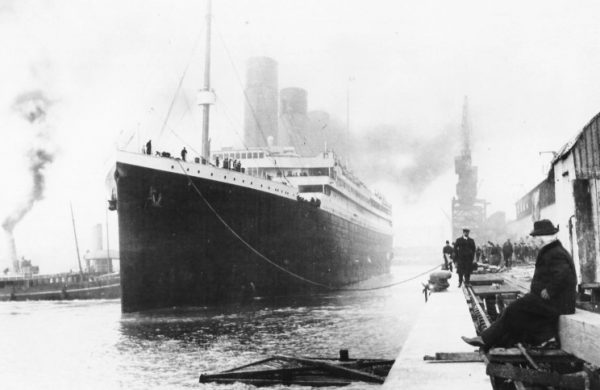
source: Photo: Universal Images Group/Getty Images

# **Objective**

The primary aim of this study is to develop a machine learning model that predicts which passengers survived the Titanic shipwreck.

# 1. IMPORT SOME NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMRegressor
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# 2. Load Data

In [ ]:
train = pd.read_csv("../input/titanic-machine-learning-from-disaster/train.csv")

In [ ]:
df = train.copy()

# 3. UNDERSTANDING THE DATA-SET


**Data Summary**

This dataset  is obtained from from https://www.kaggle.com/c/titanic/data. The data-set has 1309 examples in which 
891 are from train data set, and 418 are from test data set. In this dataset,there is one dependent variable (survived) and twelve independent or predictor variables ('PassengerId','Survived', 'Pclass', 'Name', 'Sex', 'Age','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked').

***The description of  variables in this data as follows:***

**Dependent Variable**

survival: Survival	0 = No, 1 = Yes"""

**Independent Variable**
* pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex:	Sex (Male/Female)
* Age:	Age in years
* sibsp:	# of siblings / spouses aboard the Titanic
* parch:	# of parents / children aboard the Titanic
* ticket:	Ticket number
* fare:	Passenger fare
* cabin:	Cabin number
* embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
df.head(10)

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.size

In [ ]:
df.shape

List of Variable: 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

In [ ]:
df.describe().T

In [ ]:
df.describe(include=['O'])

# 3. EXPLORATORY DATA ANALYSIS ON CATEGORICAL DATA

In this section, first of all, categorical variables should be determined. Which variables in the data set are categorical?

In [ ]:
df.Survived.unique()

In [ ]:
df.Survived.value_counts()

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))

In [ ]:
more_cat_cols = [col for col in df.columns if len(df[col].unique()) < 10]
print('Number of Categorical Variables : ', len(more_cat_cols))
print(more_cat_cols)

In [ ]:
df[cat_cols].nunique()

In [ ]:
def cats_summary(data):
    cats_names = [col for col in data.columns if len(data[col].unique()) < 10 and data[col].dtypes == 'O']
    for var in cats_names:
        print(pd.DataFrame({var: data[var].value_counts(),
                            "Ratio": 100 * data[var].value_counts() / len(data)}), end="\n\n\n")
        sns.countplot(x=var, data=data)
        plt.show()
cats_summary(df)


**Visualization of variables**

**Pclass**

In [ ]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
sns.barplot(x='Pclass', y="Survived", data=df); plt.show()

In [ ]:
sns.countplot(x="Survived", hue="Pclass",data=df); plt.show()

In [ ]:
df['Pclass'].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,7)) ; plt.show()

The Pclass type is related to the likelihood  of survival.

**Sex**

In [ ]:
df[["Sex" , "Survived"]].groupby(["Sex"] , as_index = False).mean().sort_values(by="Survived" , ascending = False)

In [ ]:
sns.barplot(x='Sex', y="Survived", data=df); plt.show()

In [ ]:
sns.countplot(x="Survived", hue="Sex",data=df); plt.show()

Females are more likely to survive than males.

**Parch**

In [ ]:
df[["Parch" , "Survived"]].groupby(["Parch"] , as_index = False) .mean().sort_values(by="Survived" , ascending = False)

In [ ]:
sns.barplot(x='Parch', y="Survived", data=df); plt.show()

In [ ]:
sns.countplot(x="Survived", hue="Parch",data=df); plt.show()

Parch type is related to the likelihood  of survival.

**Embarked**

In [ ]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
sns.barplot(x='Embarked', y="Survived", data=df); plt.show()
sns.countplot(x="Survived", hue="Embarked",data=df); plt.show()

Passengers who embarked the ship in Cherbourg are more likely to survive.

**SibSp**

In [ ]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
sns.barplot(x='SibSp', y="Survived", data=df); plt.show()
sns.countplot(x="Survived", hue="SibSp",data=df); plt.show()

SibSp is related to the probability of survival.

# 4. ANALYSIS of NUMERICAL VARIABLE

In [ ]:
df.describe().T

In [ ]:
df.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

**How many numeric variables are in the data set?
**

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Id"]
print('Number of Numerical Variables: ', len(num_cols))

In [ ]:
num_cols

**Visualization of numeric variables
**

In [ ]:
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")

hist_for_nums(df, num_cols)


# 5. ANALYSIS of DEPENDENT VARIABLE (TARGET ANALYSIS)

Finding the number of values in the target column

**Survived**

In [ ]:
df["Survived"].value_counts()

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df["Survived"].value_counts(),  labels=['survive','not survive'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# 6. DATA PREPROCESSING & FEATURE ENGINEERING


**6.1. Missing Values
* Checking  missing value

In [ ]:
df.isnull().values.any()

In [ ]:
df.isnull().sum()

For categorical columns (string columns), the missing values can be filled with mode. For numerical columns (float columns), the missing values can be filled with with mean.

**Replacing missing data with its mean
**

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [ ]:
df['Embarked'].fillna('S', inplace=True)

In [ ]:
df.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)


In [ ]:
df.isnull().sum()

The index has been reorganized.


In [ ]:
df = df.reset_index(drop=True)

**Creating new feature
**

In [ ]:
df['title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df['title'] = df['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
df['title'] = df['title'].replace('Mlle', 'Miss')
df['title'] = df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')
df[['title', 'Survived']].groupby(['title'], as_index=False).mean()
myCoding = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
df['title'] = df['title'].map(myCoding)
df['title'] = df['title'].fillna(0)


In [ ]:
df.head()

In [ ]:
df.info()


After creating "title" feature, no necessary to keep "Name" feature in datasets.

In [ ]:
df.drop(['Name'], axis=1, inplace=True)

In [ ]:
df.head()

**Creating 'FamilySize' feature**

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize'].value_counts()

In [ ]:
sns.heatmap(df.isnull()); plt.show()

In [ ]:
df['Age*Class'] = df.Age * df.Pclass

In [ ]:
df.head()

# 8. LABEL ENCODING & ONE-HOT ENCODING


Label encoding was applied to categorical variables.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]= le.fit_transform(df["Sex"])

One hot encoding was applied to categorical variables (two or more).


In [ ]:
def one_hot_encoder(dataframe):
    dataframe = pd.get_dummies(dataframe, columns=["Embarked",'title', 'Fare'], drop_first=True)
    new_columns = [c for c in dataframe.columns if c not in original_columns]
    return dataframe, new_columns


In [ ]:
df.drop(['Embarked', 'title', 'Fare'], axis=1 , inplace=True)

# 8. MODELING

In [ ]:
X = df.drop('Survived', axis=1)
y = df[["Survived"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=66)

**KNeighborsClassifier**


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,y_train) * 100, 2)
acc_knn

**Gaussian Naive Bayes**

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

**Decision Tree
**

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

**Random Forest**


In [ ]:
random_forest = RandomForestClassifier(n_estimators=46)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest


**LogisticRegression
**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(logreg.score(X_train, y_train) * 100, 2)
acc_logreg


**Gradient Boosting Classifier
**

In [ ]:
gbkk = GradientBoostingClassifier()
gbkk.fit(X_train, y_train)
gbk_pred = gbkk.predict(X_test)
acc_gbkk = round(gbkk.score(X_train, y_train) * 100, 2)
acc_gbkk

**LightGBM**


In [ ]:
lgbm = LGBMClassifier(random_state=46)
lgbm.fit(X_train, y_train)
Lgbm_pred = lgbm.predict(X_test)
acc_lgbm = round(lgbm.score(X_train, y_train) * 100, 2)
acc_lgbm

In [ ]:
models = pd.DataFrame({
    'Model': [ 'KNN', "LightGBM",'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Decision Tree', "Gradient Boosting Classifier"],
    'Score': [ acc_knn, acc_logreg,
              acc_random_forest, acc_gaussian,
              acc_decision_tree, acc_gbkk, acc_lgbm]})
models.sort_values(by='Score', ascending=False)
